# Building an Image Classifier

First let's import TensorFlow and Keras.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [6]:
X_train_full[0].shape

(28, 28)

In [ ]:
0 - 255

In [10]:
# Data
X_train = X_train_full[:5000] / 255.
X_valid = X_train_full[5000:] / 255.

#Labels
y_train = y_train_full[:5000]
y_valid = y_train_full[5000:]

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

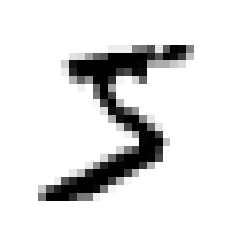

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [8]:
y_train

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

Here are the corresponding class names:

In [13]:
class_names = ["Zero", "One", "Two", "Three", "Four",
               "Five", "Six", "Seven", "Eight", "Nine"]

So the first image in the training set is a coat:

In [14]:
y_train[0]

5

In [15]:
class_names[y_train[0]]

'Five'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [11]:
X_train.shape

(5000, 28, 28)

In [16]:
28*28

784

In [12]:
X_valid.shape

(55000, 28, 28)

In [ ]:
# cat:1
# dog:2
# car:3
# pandas:4
# bird:5
    
# [0, 1, 0, 0, 0]
# [0, 0, 1, 0, 0]

Let's take a look at a sample of the images in the dataset:

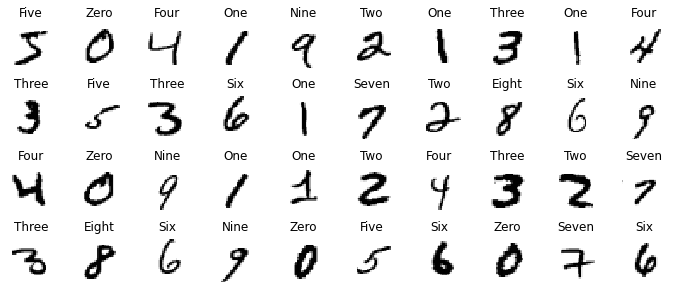

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
28*28

784

In [16]:
# another model definition
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
(784*50 ) + 50

39250

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [22]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_valid, y_valid))

Train on 5000 samples, validate on 55000 samples
Epoch 1/10
5000/5000 [==============================] - 6s 1ms/sample - loss: 1.8011 - accuracy: 0.5106 - val_loss: 1.3576 - val_accuracy: 0.7291
Epoch 2/10
5000/5000 [==============================] - 5s 1ms/sample - loss: 1.0596 - accuracy: 0.8042 - val_loss: 0.8966 - val_accuracy: 0.8165
Epoch 3/10
5000/5000 [==============================] - 5s 967us/sample - loss: 0.7470 - accuracy: 0.8516 - val_loss: 0.7008 - val_accuracy: 0.8379
Epoch 4/10
5000/5000 [==============================] - 5s 1ms/sample - loss: 0.6020 - accuracy: 0.8716 - val_loss: 0.5985 - val_accuracy: 0.8565
Epoch 5/10
5000/5000 [==============================] - 5s 995us/sample - loss: 0.5201 - accuracy: 0.8808 - val_loss: 0.5374 - val_accuracy: 0.8637
Epoch 6/10
5000/5000 [==============================] - 5s 977us/sample - loss: 0.4673 - accuracy: 0.8868 - val_loss: 0.4980 - val_accuracy: 0.8697
Epoch 7/10
5000/5000 [==============================] - 5s 960us/samp

In [23]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': 157,
 'samples': 5000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [24]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

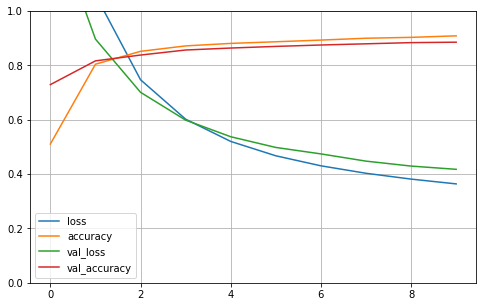

In [26]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
model.evaluate(X_valid, y_valid)

55000/55000 [==============================] - 5s 87us/sample - loss: 0.4175 - accuracy: 0.8852


[0.4174955341165716, 0.8852364]

In [28]:
X_new = X_valid[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.92, 0.  , 0.03],
       [0.  , 0.  , 0.  , 0.96, 0.  , 0.  , 0.  , 0.  , 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.38, 0.01, 0.  , 0.03, 0.03, 0.53]],
      dtype=float32)

In [29]:
y_pred = model.predict_classes(X_new)
y_pred

array([7, 3, 9], dtype=int64)

In [30]:
np.array(class_names)[y_pred]

array(['Seven', 'Three', 'Nine'], dtype='<U5')

In [31]:
y_new = y_valid[:3]
y_new

array([7, 3, 4], dtype=uint8)

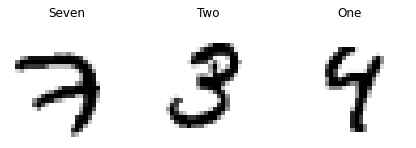

In [32]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [33]:
model.save("my_keras_model.h5")

In [34]:
model = keras.models.load_model("my_keras_model.h5")

# Regression MLP

Let's load, split and scale the California housing dataset:

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [38]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

In [39]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 165us/sample - loss: 2.3255 - val_loss: 0.9273
Epoch 2/20
11610/11610 [==============================] - 1s 112us/sample - loss: 0.7432 - val_loss: 0.8144
Epoch 3/20
11610/11610 [==============================] - 1s 113us/sample - loss: 0.6648 - val_loss: 0.6856
Epoch 4/20
11610/11610 [==============================] - 1s 116us/sample - loss: 0.6271 - val_loss: 0.6096
Epoch 5/20
11610/11610 [==============================] - 1s 112us/sample - loss: 0.5955 - val_loss: 0.6861
Epoch 6/20
11610/11610 [==============================] - 1s 117us/sample - loss: 0.5709 - val_loss: 0.6164
Epoch 7/20
11610/11610 [==============================] - 1s 120us/sample - loss: 0.5481 - val_loss: 0.5401
Epoch 8/20
11610/11610 [==============================] - 1s 112us/sample - loss: 0.5267 - val_loss: 0.5606
Epoch 9/20
11610/11610 [==============================] - 1s 115us/sample - loss: 0.510

In [40]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 70us/sample - loss: 0.4205


In [41]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

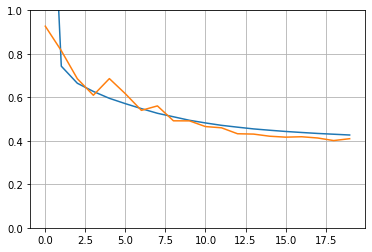

In [42]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:
y_pred

array([[0.66032445],
       [1.5918756 ],
       [3.274242  ]], dtype=float32)